In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import sklearn
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [2]:
# Define the stock and date range
start = '1980-01-01'
end = '2024-10-15'
stock = '^GSPC'

# Download the stock data
yfd = yf.download(stock, start=start, end=end)

# Prepare the DataFrame
df = pd.DataFrame({'Close': yfd['Close']})
df = df.dropna().reset_index(drop=True)
print(df[-10:])

[*********************100%***********************]  1 of 1 completed

             Close
11281  5708.750000
11282  5709.540039
11283  5699.939941
11284  5751.069824
11285  5695.939941
11286  5751.129883
11287  5792.040039
11288  5780.049805
11289  5815.029785
11290  5859.850098


# Visualize The Data

[[ 105.76000214]
 [ 105.22000122]
 [ 106.51999664]
 ...
 [5780.04980469]
 [5815.02978516]
 [5859.85009766]] (11291, 1)
(11291,) (11291,)


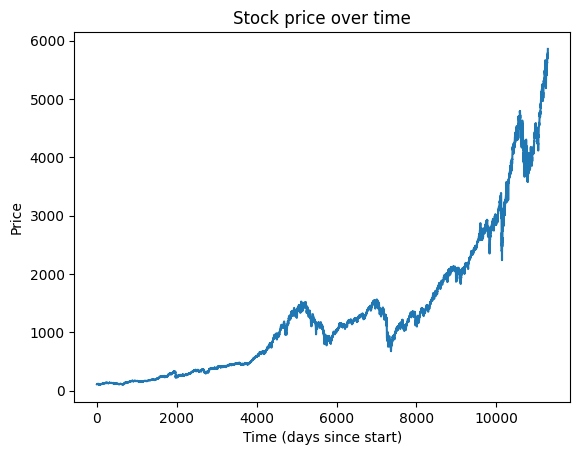

In [3]:
df = np.array(df)
index = np.linspace(1, df.shape[0], df.shape[0])

print(df, df.shape)
print(index.shape, df.T[0].shape)

plt.plot(index, df.T[0])
plt.title("Stock price over time")
plt.xlabel('Time (days since start)')
plt.ylabel('Price')
plt.show()


# Split the data into bins

In [4]:
bin_size = 365 # We require the past year of data

bins = np.array([df[i:i + bin_size].T.reshape(-1) for i in range(0, len(df) - bin_size - 1, 1)])

print(bins.shape)
print(bins[0][:5], bins[0].shape)
print(bins[1][:5], bins[1].shape)
print(bins[2][:5], bins[2].shape)
print(bins[3][:5], bins[3].shape)
print(bins[4][:5], bins[4].shape)

print(bins[-1][-10:])


(10925, 365)
[105.76000214 105.22000122 106.51999664 106.80999756 108.94999695] (365,)
[105.22000122 106.51999664 106.80999756 108.94999695 109.05000305] (365,)
[106.51999664 106.80999756 108.94999695 109.05000305 109.88999939] (365,)
[106.80999756 108.94999695 109.05000305 109.88999939 109.91999817] (365,)
[108.94999695 109.05000305 109.88999939 109.91999817 110.37999725] (365,)
[5738.16992188 5762.47998047 5708.75       5709.54003906 5699.93994141
 5751.06982422 5695.93994141 5751.12988281 5792.04003906 5780.04980469]


# Split Data: Train and Test

In [19]:
# Generally it is good practice to train data on 80 % of the data and test on 20%
train_size = math.floor(len(bins)* 0.8) # 80% of the data
test_size = len(bins) - train_size # 20% of the data
assert train_size + test_size == len(bins)

# split into X and y
X_train = np.array(bins[:train_size])
y_train = np.array(df[bin_size:bin_size + train_size]).T.reshape(-1)
train_index = index[:train_size]

X_test = np.array(bins[train_size:])
y_test = np.array(df[bin_size + train_size: bin_size + train_size + test_size]).T.reshape(-1) # the value after the bin_size
test_index = index[train_size + 1: train_size + 1 + test_size]

print("train_size:", train_size)
print("test_size:", test_size)
print("x_size:", X_train.shape, X_test.shape)
print("y_size:", y_train.shape, y_test.shape)
# print(X_test[-1][-15:])
# print(y_test[-10:])


train_size: 8740
test_size: 2185
x_size: (8740, 365) (2185, 365)
y_size: (8740,) (2185,)


# Train the linear model

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_) # weights
print(model.intercept_) # bias

[ 1.24335458e-02 -4.53392661e-03  2.13729417e-02 -3.39456469e-02
  1.03129583e-02 -1.01659238e-02  6.13105854e-03 -5.60132553e-03
  1.02689139e-02 -7.80833478e-03 -1.27095837e-02  2.28443507e-02
  7.89403048e-03 -9.61482628e-03 -5.25748653e-05 -1.32622712e-02
  1.34609123e-02 -6.99687597e-03  9.85737364e-03 -2.03742087e-02
  1.93222456e-02 -4.91032210e-03  1.82683589e-03  1.63397237e-02
 -6.02269254e-02  1.49817547e-02  9.27413470e-03  7.91371035e-03
 -2.44624825e-02  3.23968545e-02 -1.04144571e-02 -3.05658270e-03
 -7.99197610e-03  2.37422044e-02  1.36512078e-02 -2.66899292e-03
 -1.49389124e-02 -1.66828221e-02 -7.33559472e-03  3.16829805e-02
  1.79448589e-03 -4.28463221e-03 -5.91878940e-03 -1.45742678e-02
  3.76380393e-02 -3.05997537e-02  1.79114210e-02 -3.26883420e-02
  5.57635273e-03  1.74016290e-02 -6.47049896e-03  2.06858982e-02
 -1.86928561e-02 -1.03074429e-02  2.97694816e-02 -3.17558759e-04
 -2.93415891e-02  3.90635091e-02 -1.00561377e-02 -2.10376948e-02
  1.19347069e-02 -2.61472

In [21]:
# now we make some predictions
# y_pred = 0
# for i in range(len(y_test)):
#     y_pred = model.predict([X_test[i]])
#     print(y_pred, y_test[i])

y_pred = np.floor(model.predict(X_test))
y_test = np.floor(y_test)
print(y_pred.shape, y_test.shape)

for i in range(math.floor(len(y_pred) * 0.01)):
    print(y_pred[i], y_test[i])
# print(y_pred)
print(X_test.shape)


(2185,) (2185,)
1886.0 1853.0
1868.0 1852.0
1846.0 1851.0
1845.0 1829.0
1830.0 1864.0
1867.0 1895.0
1894.0 1926.0
1921.0 1917.0
1917.0 1917.0
1913.0 1945.0
1939.0 1921.0
1929.0 1929.0
1929.0 1951.0
1947.0 1948.0
1955.0 1932.0
1933.0 1978.0
1990.0 1986.0
2000.0 1993.0
1998.0 1999.0
1991.0 2001.0
1995.0 1979.0
(2185, 365)


(8740,) (2185,)


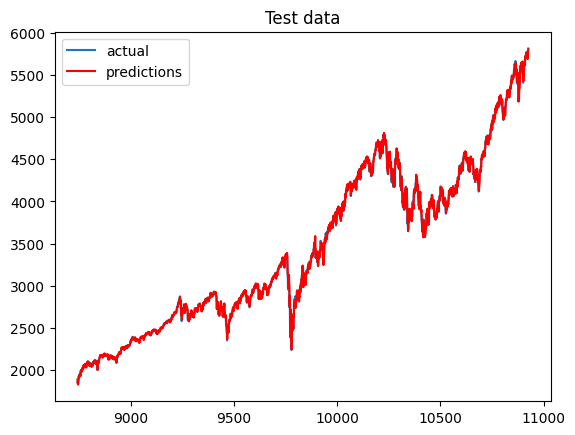

Correctly Classified: 42/2185
Accuracy: 1.9221967963386728%


In [22]:
print(train_index.shape, test_index.shape)
plt.plot(test_index, y_test, label="actual")
plt.plot(test_index, y_pred, color="red", label="predictions")
plt.title("Test data")
plt.legend()
plt.show()

results = y_pred == y_test
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%")


In [11]:
print(f"Tomorrows Price: {y_pred[-1]}")
print(y_pred[-15:])
print(y_test[-15:])

Tomorrows Price: 4119.0
[4091. 4146. 4137. 4151. 4154. 4154. 4129. 4133. 4137. 4071. 4055. 4135.
 4169. 4167. 4119.]
[4091.94995117 4146.22021484 4137.64013672 4151.31982422 4154.87011719
 4154.52001953 4129.79003906 4133.52001953 4137.04003906 4071.62988281
 4055.98999023 4135.35009766 4169.47998047 4167.87011719 4119.58007812]
